## 問題一、請在報告中補充 ELU (數學式、函數的圖、參考文獻等)，以及使用原因、比較

以下是ReLU、ELU的數學式和函數圖：

* ReLU
<img src="說明圖片/relu.png" height="50%" width="50%">


* ELU
<img src="說明圖片/elu.png" height="50%" width="50%">


根據上面的的數學式和函數圖，由於ReLU會將小於0的值全部轉成0，這樣可能會發生「Dead ReLU」的現象，即某些神經元可能永遠不會被激活，導致相應的參數永遠不能被更新，那麼該神經元就相當於「壞死」了。為了讓神經網路中的每一個神經元都能學到東西，因此我們改用ELU作為激活函數，由於ELU在輸入小於0的時候會透過公式轉換成一個非0的負值，這樣可以避免「Dead ReLU」的現象。另外，ELU會產生負的輸出，這有助於神經網絡微調神經元的權重和bias至正確的方向。其他部分還有ELU的輸出均值約等於0(zero-centered)，但是這點能為神經網路帶來什麼好處，目前我還不是很清楚。不過ELU本身也有一些缺點，例如指數運算會增加運算時間，以及公式中的alpha值不能透過神經網路去學習等，而且**目前也沒有文獻證實哪一種激活函數一定比較好**，因此最好的方法就是同時嘗試這兩種激活函數，看自己的資料集在哪一種激活函數下的表現會比較好。

參考來源：  
* https://mlfromscratch.com/activation-functions-explained/#/
* https://zhuanlan.zhihu.com/p/25110450

為了測試哪一種激活函數在我們的專案中會使模型的表現比較好，因此我們用 **基本模型**(Keras官網MNIST手寫數字辨識資料集的CNN範例，參考來源：https://keras.io/examples/mnist_cnn/) + **男明星的資料集** 下去測試，比較基本模型除了輸出層之外，分別用 ReLU 和 ELU 做為激活函數，模型預測測試集的準確率。

備註：目前輸出層我們是用softmax做為激活函數，由於softmax的輸出介於0到1之間，而且各個類別的輸出結果加總為1，比較好在之後定義相似度(和明星有多像)的部分。

### 男明星資料集 - 前置作業

<Figure size 432x432 with 0 Axes>

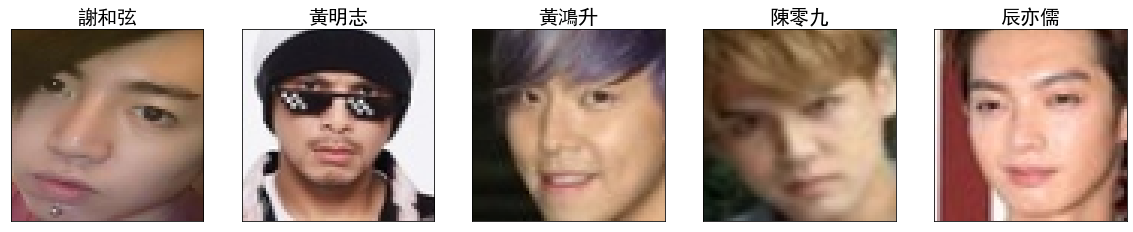

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pickle

# 讀取之前經過處理後的X和y，以及類別的名稱
pickle_in = open("x_train.pickle","rb")
x_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("x_test.pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

pickle_in = open("class_names.pickle","rb")
class_names = pickle.load(pickle_in)

pickle_in.close()

# 根據數據集內容建立重要參數
IMG_SIZE = x_train.shape[1]
CHANNEL_NUM = x_train.shape[3]

input_shape = x_train.shape[1:]
class_num = y_train.shape[1]

# plt相關參數設定
plt.rcParams['font.sans-serif'] = ['simhei'] # matplotlib的字體資料夾中必須要有「simhei」這個字體才能正常顯示中文字體
plt.rcParams['axes.unicode_minus'] = False # 可以正常顯示負號
plt.figure(figsize=(6,6)) # 畫布大小

# 隨機看訓練集中的5筆資料
pick = np.random.choice(x_train.shape[0], 5, replace=False)
plt.figure(figsize=(20,10)) # 調整畫布的大小

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[np.argmax(y_train[n])], fontsize=20)
    if CHANNEL_NUM == 3:
        plt.imshow(x_train[n], cmap='Greys') 
    elif CHANNEL_NUM == 1:
        plt.imshow(x_train[n].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')

### 男明星資料集 - 基本模型((除了輸出層之外用ReLU做為激活函數))

In [2]:
# 載入建模相關的套件
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

### Keras官網Mnist資料集的CNN範例 ###
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 128, epochs = 12, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test)
print(f'Test loss: {score[0]: .4f}')
print(f'Test accuracy: {score[1]: .4f}')

Using TensorFlow backend.




Train on 6250 samples, validate on 1250 samples
Epoch 1/12
6250/6250 [==============================] - 28s 4ms/step - loss: 3.9307 - accuracy: 0.0269 - val_loss: 3.8659 - val_accuracy: 0.0600
Epoch 2/12
6250/6250 [==============================] - 23s 4ms/step - loss: 3.7890 - accuracy: 0.0530 - val_loss: 3.6454 - val_accuracy: 0.1048
Epoch 3/12
6250/6250 [==============================] - 23s 4ms/step - loss: 3.5254 - accuracy: 0.1091 - val_loss: 3.3491 - val_accuracy: 0.1728
Epoch 4/12
6250/6250 [==============================] - 23s 4ms/step - loss: 3.2861 - accuracy: 0.1502 - val_loss: 3.1107 - val_accuracy: 0.2312
Epoch 5/12
6250/6250 [==============================] - 23s 4ms/step - loss: 3.0915 - accuracy: 0.1813 - val_loss: 2.9504 - val_accuracy: 0.2856
Epoch 6/12
6250/6250 [==============================] - 23s 4ms/step - loss: 2.9400 - accuracy: 0.2053 - val_loss: 2.7954 - val_accuracy: 0.3176
Epoch 7/12
6250/6250 [==============================] - 23s 4ms/step - loss: 2.7

### 男明星資料集 - 基本模型(除了輸出層之外用ELU做為激活函數)

In [4]:
keras.backend.clear_session() # 清空現有的模型

### Keras官網Mnist資料集的CNN範例 ###
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='elu'))

model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))

model.add(Dense(class_num, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 128, epochs = 12, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test)
print(f'Test loss: {score[0]: .4f}')
print(f'Test accuracy: {score[1]: .4f}')

Train on 6250 samples, validate on 1250 samples
Epoch 1/12
6250/6250 [==============================] - 24s 4ms/step - loss: 5.0413 - accuracy: 0.0256 - val_loss: 3.8541 - val_accuracy: 0.0560
Epoch 2/12
6250/6250 [==============================] - 23s 4ms/step - loss: 4.3871 - accuracy: 0.0275 - val_loss: 3.7582 - val_accuracy: 0.0848
Epoch 3/12
6250/6250 [==============================] - 23s 4ms/step - loss: 3.7608 - accuracy: 0.0950 - val_loss: 3.1102 - val_accuracy: 0.2216
Epoch 4/12
6250/6250 [==============================] - 23s 4ms/step - loss: 2.7850 - accuracy: 0.2923 - val_loss: 2.5862 - val_accuracy: 0.3424
Epoch 5/12
6250/6250 [==============================] - 23s 4ms/step - loss: 2.1795 - accuracy: 0.4371 - val_loss: 2.3761 - val_accuracy: 0.4032
Epoch 6/12
6250/6250 [==============================] - 23s 4ms/step - loss: 1.7816 - accuracy: 0.5286 - val_loss: 2.2541 - val_accuracy: 0.4344
Epoch 7/12
6250/6250 [==============================] - 23s 4ms/step - loss: 1.416

根據上面的結果，在其他條件不變之下，除了輸出層之外用ELU做為激活函數的模型在測試集的準確率(48.32%)贏過用ReLU做為激活函數的(41.68%)，測試集的loss也比較低(2.1588 < 2.3474)，代表「在我們的案例中」，用ELU做為激活函數能夠增加我們明星臉部辨識模型的預測能力(不過這個結論目前是在兩個模型分別只有各跑一次的情形下得出來的(時間因素)，未來可能要跑更多次，或是實施「k-fold cross-validation」，確保這個結果是「穩定的」，才能使我們對這個結論更加有信心)。

## 問題二、Early stoppoing 應清晰解釋使用的設定跟原因

「早停機制(early stop mechanism)」即模型訓練一段時間之後，當監控指標(通常是驗證集的loss，或是驗證集的準確率)經過「一定的訓練回數(epoch)」後仍然沒有進步的話，就提前結束訓練，代表模型的泛化能力已經不再提升，再訓練下去只是讓模型去「死背」訓練集的內容，這樣不僅能夠節省模型訓練的時間，也可以防止模型發生overfitting的問題。至於「一定的訓練回數」是透過「patience」這個參數去設定的，例如把patience設成3代表當監控指標經過3個epoch還是沒有進步的話，就提前結束訓練。

我們有分兩個階段實施early stop：
* 在調參的過程中，我們將訓練資料的1/5(25 * 50張照片)作為驗證集，開始訓練模型，此時我們實施Early Stopping，以「驗證集的loss」作為監控模型的指標，防止模型overfitting於訓練集，其中我們將patience設成3，代表驗證集的loss如果經過3個epoch還是沒有下降的話，就提前結束訓練。
* 根據驗證集的表現決定我們最終的模型架構後，我們會再將驗證集加入訓練資料一同下去訓練，而這部分也有實施Early Stopping，不過改用「測試集的loss」作為監控模型的指標，一樣是防止模型overfitting於訓練集 + 驗證集的部分，然後我們一樣將patience設成3，代表測試集的loss如果經過3個epoch還是沒有下降的話，就提前結束訓練。

至於要用loss還是準確率作為監控指標，這篇網站 https://kharshit.github.io/blog/2018/12/07/loss-vs-accuracy 的結論是「沒有絕對的答案，主要是依使用情境而定」。如同這篇網站的結論，由於我們是建立一個「輸入別人照片，跑出一個明星結果的模型」，所以比起準確率，我們更在意的是「模型判斷不同臉部特徵的能力」，雖然有時模型在測試集的預測結果不是那麼地準確，但這有可能是因為某些明星之間本身的臉部特徵就很相似的緣故，模型仍然具備一定程度的臉部特徵能力，因此我們最後就以loss作為Early stoppoing的監控指標。

## 問題三、資料當中有沒有哪些人物是容易預測的？有沒有人是不容易預測的？

為了查看資料集中「有沒有哪些明星是容易或不容易預測的」，因此我們讀進之前我們訓練好的最終版模型，查看測試集中各個明星的預測準確率。

### 男明星最終版模型 - 測試集中各個男明星的預測準確率

**生成男明星最終版模型在測試集中對各個男明星的預測準確率** 

由於sklearn.metrics.classification_report生成的報表中沒有各個類別的accuracy，因此這裡暫時以「f1-score」做為模型預測的準確率。

In [1]:
# 讀進男明星的測試集資料和明星名稱列表
import pickle
import numpy as np
pickle_in = open("x_test.pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

pickle_in = open("class_names.pickle","rb")
class_names = pickle.load(pickle_in)

pickle_in.close()

# 讀進男明星最終版模型
from tensorflow.keras.models import load_model
model = load_model('myModel_male.h5')

# 生成各個類別的預測結果
from sklearn.metrics import classification_report
y_pred = model.predict_classes(x_test)
y_test = np.argmax(y_test, axis=1)

In [2]:
### 將預設結果整理成DataFrame ###
import pandas as pd
report = classification_report(y_test, y_pred, output_dict=True)
df_male = pd.DataFrame(report).transpose()
df_male = df_male[:50] # 不用最後幾列平均的統計結果
df_male.insert(loc=0, column='star_name', value=class_names)
df_male = df_male.drop(['precision', 'recall', 'support'], axis=1) 
    # 暫時只用star_name和f1-score的欄位，f1score = 2 * recall precision / (recall + precision)
df_male = df_male.sort_values(by='f1-score') # 按照準確率排列資料(升冪排列)

在取得測試集中各個男明星的預測準確率的過程中，我們發現**每位明星測試集的資料數量不一致**，因為我們當初在切分測試資料的時候(sklearn.model_selection.train_test_split)，忘記設「stratify」這個參數了(分層抽樣)，stratify=True才能確保每一位明星在測試集的資料數是相同的，這是未來我們必須改善的部分。

**測試集準確率最佳十名的明星**

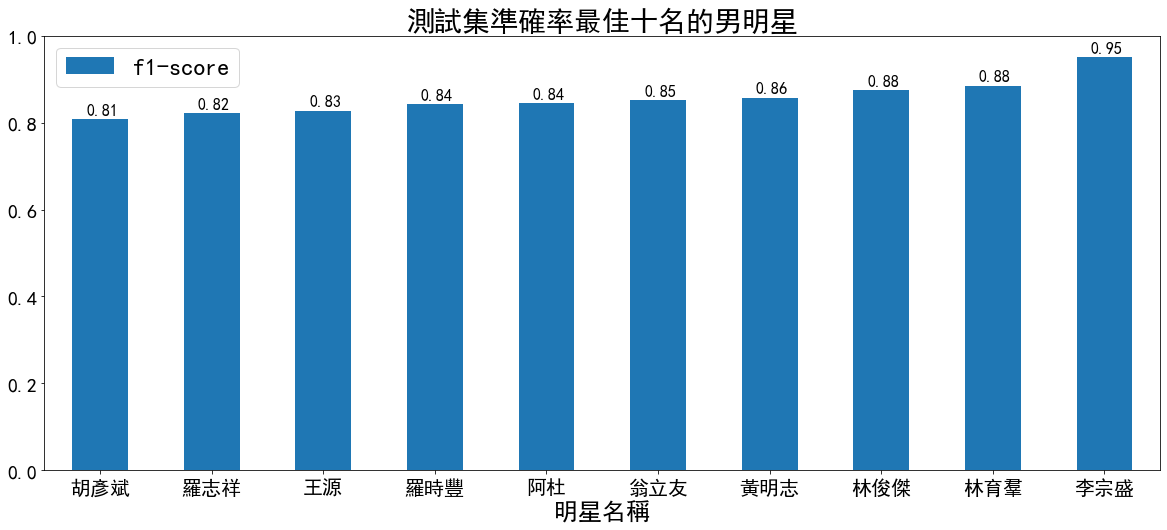

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['simhei'] # matplotlib的字體資料夾中必須要有「simhei」這個字體才能正常顯示中文字體
df_male[40:].plot.bar(x='star_name', figsize=(20,8), fontsize=20, ylim=(0, 1))
plt.xticks(rotation=0)
plt.xlabel('明星名稱', fontsize=24)
plt.legend(fontsize=24)
plt.title('測試集準確率最佳十名的男明星', fontsize=28)
# 在長條圖的bar上顯示對應的y值
for i, v in enumerate(df_male[40:]['f1-score']):
    plt.text(i - 0.125, v + 0.01, str(np.round(v, 2)),fontsize=16)

**測試集準確率最差十名的男明星**

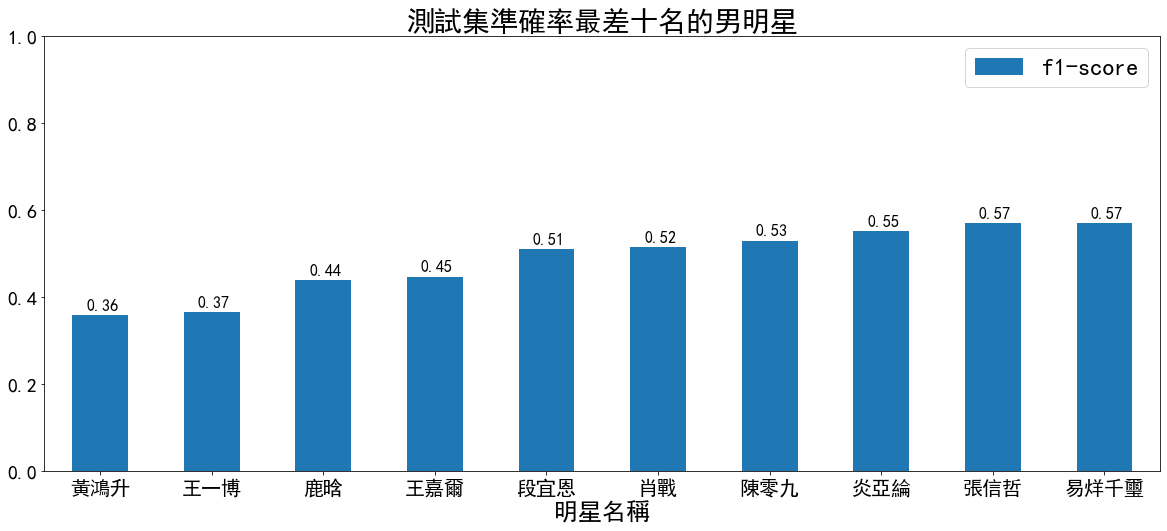

In [4]:
plt.rcParams['font.sans-serif'] = ['simhei'] # matplotlib的字體資料夾中必須要有「simhei」這個字體才能正常顯示中文字體
df_male[:10].plot.bar(x='star_name', figsize=(20,8), fontsize=20, ylim=(0, 1))
plt.xticks(rotation=0)
plt.xlabel('明星名稱', fontsize=24)
plt.legend(fontsize=24)
plt.title('測試集準確率最差十名的男明星', fontsize=28)
# 在長條圖的bar上顯示對應的y值
for i, v in enumerate(df_male[:10]['f1-score']):
    plt.text(i - 0.125, v + 0.01, str(np.round(v, 2)),fontsize=16)

### 女明星最終版模型 - 測試集中各個女明星的預測準確率

**生成女明星最終版模型在測試集中對各個女明星的預測準確率**

In [5]:
# 讀進女明星的測試集資料和明星名稱列表
pickle_in = open("x_test.pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

pickle_in = open("class_names.pickle","rb")
class_names = pickle.load(pickle_in)

pickle_in.close()

# 讀進女明星最終版模型
model = load_model('myModel_female.h5')

# 生成各個類別的預測結果
y_pred = model.predict_classes(x_test)
y_test = np.argmax(y_test, axis=1)

In [6]:
### 將預設結果整理成DataFrame ###
import pandas as pd
report = classification_report(y_test, y_pred, output_dict=True)
df_female = pd.DataFrame(report).transpose()
df_female = df_female[:50] # 不用最後幾列平均的統計結果
df_female.insert(loc=0, column='star_name', value=class_names)
df_female = df_female.drop(['precision', 'recall', 'support'], axis=1) 
    # 暫時只用star_name和f1-score的欄位，f1score = 2 * recall precision / (recall + precision)
df_female = df_female.sort_values(by='f1-score') # 按照準確率排列資料(升冪排列)

**測試集準確率最佳十名的女明星**

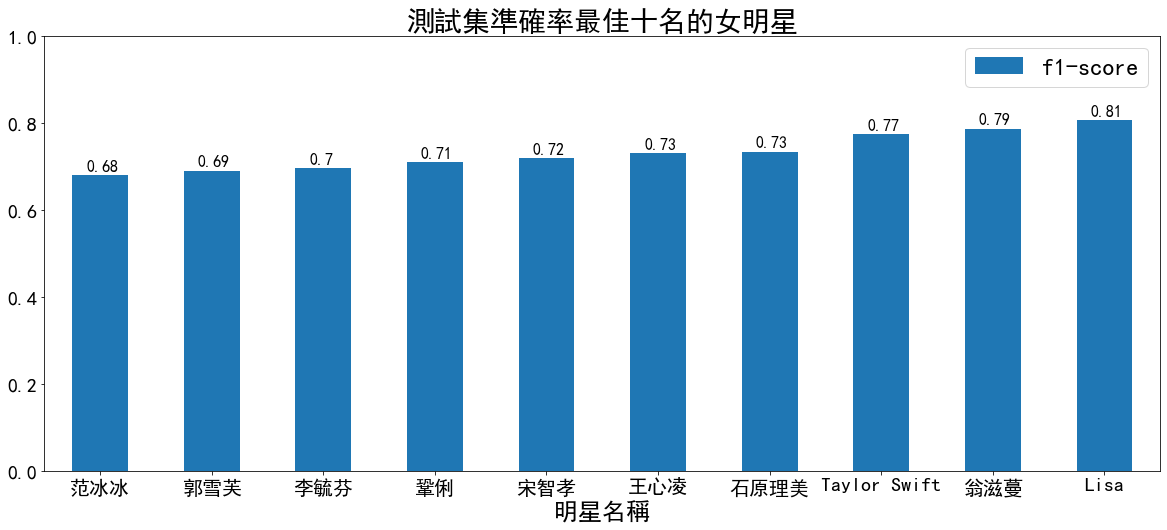

In [7]:
df_female[40:].plot.bar(x='star_name', figsize=(20,8), fontsize=20, ylim=(0, 1))
plt.xticks(rotation=0)
plt.xlabel('明星名稱', fontsize=24)
plt.legend(fontsize=24)
plt.title('測試集準確率最佳十名的女明星', fontsize=28)
# 在長條圖的bar上顯示對應的y值
for i, v in enumerate(df_female[40:]['f1-score']):
    plt.text(i - 0.125, v + 0.01, str(np.round(v, 2)),fontsize=16)

**測試集準確率最差十名的女明星**

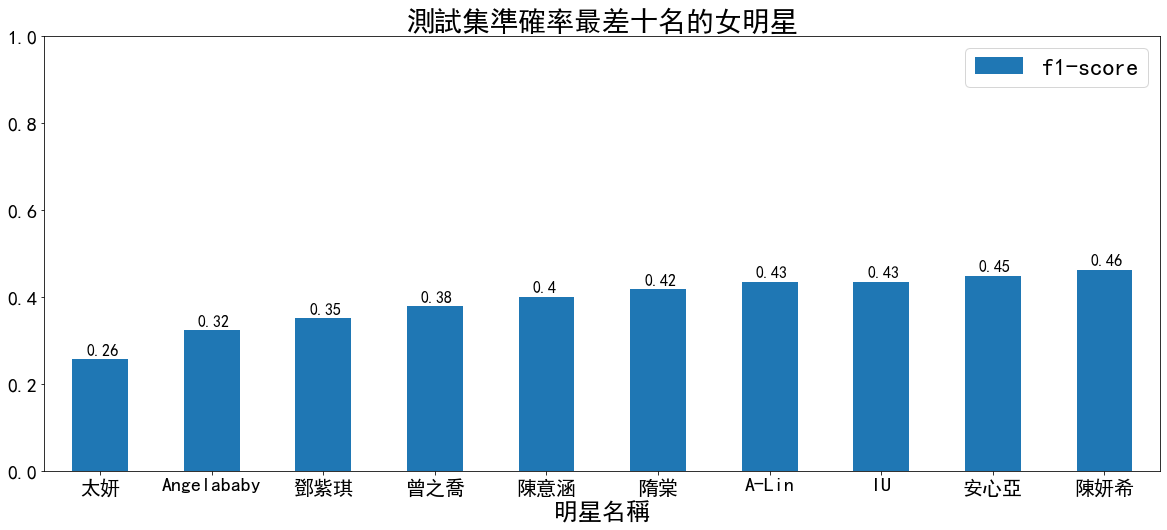

In [8]:
df_female[:10].plot.bar(x='star_name', figsize=(20,8), fontsize=20, ylim=(0, 1))
plt.xticks(rotation=0)
plt.xlabel('明星名稱', fontsize=24)
plt.legend(fontsize=24)
plt.title('測試集準確率最差十名的女明星', fontsize=28)
# 在長條圖的bar上顯示對應的y值
for i, v in enumerate(df_female[:10]['f1-score']):
    plt.text(i - 0.125, v + 0.01, str(np.round(v, 2)),fontsize=16)

### 原因探討

根據上面的結果，對於準確率不高的明星，我們大致可以整理出三個原因：

* 原因一：資料集中該位明星的臉部照片良率不高  
以女明星中模型預測準確率比較低的曾之喬為例，其資料集本身有許多照片還是含有一部分的背景(如下圖中反白的照片)，可能是之前組員處理完該明星的臉部資料之後發現照片不夠再去網路上補，但沒有確實地將背景的部份去除。
<img src="說明圖片/response_1.png">

* 原因二：該位明星的打扮風格多變  
以女明星中模型預測準確率最低的太妍、Angelababy為例，觀察其臉部資料集，會發現明明是同一個人，卻有各種「百變」的型態，這樣會增加模型辨識上的困難度。

太妍的臉部資料集(部分)：
<img src="說明圖片/response_2.png">

Angelababy的臉部資料集(部分)：
<img src="說明圖片/response_3.png">


* 原因三：多位明星之間的打扮風格類似  
例如在模型預測準確率比較低的男明星當中，王一博、鹿晗、王嘉爾、段宜恩、肖戰等明星其打扮風格都是走「韓系風」，基本上把這些明星的人名拿掉用肉眼也難以分出誰是誰(除非你本身很了解這些明星)，更何況是模型？
<img src="說明圖片/response_4.png">


至於為什麼黃鴻升的模型預測準確率特別地低，目前我們還沒有找出真正的原因，但推測應該也是受到其他長相或是打扮風格類似的明星影響。  



而對於那些準確率比較高的明星，我們大致可以整理出兩個原因：

* 原因一：打扮風格非常一致  
以女明星中模型預測準確率最高的Lisa為例，其臉部照片中的打扮風格非常一致。
<img src="說明圖片/response_5.png">

* 原因二：臉部特徵有別於資料集中的其他明星  
例如男明星的資料集中，李宗盛、羅時豐年紀較長，林育羣臉部較為圓潤，王源較年輕，黃明志時常戴毛帽入鏡；女明星的資料集中，Taylor Swift是唯一一位來自歐美國家的女明星，鞏俐膚色黝黑，而這些都是有別於資料集中其他明星的。
<img src="說明圖片/response_6.png">

因此，**臉部照片良率不高**、**打扮風格多變**或是**打扮風格和其他明星類似**的明星是模型不容易辨識出來的；而**打扮風格一致**、**臉部特徵有別於資料集中的其他明星**的明星是模型比較容易辨識出來的。

## 問題四、模型的建置過程希望可以再解釋詳細模型參數、層數的設定原因及比較

由於我們將大部分的心力都花在資料集的建置上，有鑑於時間壓力，調參過程中基本上我們沒有訂定出一個「嚴謹」的調參過程，例如用試算表將每一種參數組合調整的結果記錄下來，直到找出最好的參數組合為止。我們有的時候是試了這個參數後發現這個參數「可能」對模型預測能力有幫助，就決定改用該參數了，然後也不知道原因為何，也不知道這麼做是不是真的對模型的預測能力有幫助，還是模型剛好準確率稍微高了一點(目前我們的模型如果用相同的架構下去訓練可能準確率也會有正負3之間的落差)，因此未來我們必須研究出一個更好的調參流程才行，不過亡羊補牢，猶未晚也，我們還是能在事後試著去探討詳細模型參數、層數的設定原因及比較，而這裡我們將著重在我們最終版本的模型和基本模型 (https://keras.io/examples/mnist_cnn/) 差異的部分。

以下是基本模型和我們最終版本模型的模型架構：

In [ ]:
### 基本模型：Keras官網Mnist資料集的CNN範例 ###
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
### 最終修改後的版本 ###
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=input_shape, activation='elu')) # relu換成elu效果更好
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))

model.add(Dense(class_num, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

根據上面的兩種模型架構，如果要把和基本模型不同的地方一一拆開來講述的話，其中「激活函數從relu改成elu」和「實施early stopping」(雖然直接從上圖看無法看出最終版本的模型有實施early stopping，但實際上我們有做)的原因已經分別在第一題和第二題解釋了，主要剩下「加深模型層數」和「卷積層後的Dropout改用SpatialDropout2D」的部分，

首先是加深模型層數的部分，雖然我們尚未證實這麼做對我們模型預測能力的提升是有幫助的，但基本模型的架構主要是迎合MNIST手寫數字辨識資料集，由於MNIST資料集中只有十個類別，而且數字相對於人臉來說，需要學習的細部特徵相對較少，因此我們認為加深模型深度有助於模型學習到更多臉部特徵辨識的「知識」。不過我們也不是一股腦單純增加模型層數就是了，因為模型如果建得太深(層數太多)，後面幾層將會出現「梯度消失」的問題，反而適得其反，對模型的預測能力造成傷害，因此我們目前就只加了兩個卷積層和池化層的組合以及一個全連接層和Dropout的組合。至於為什麼是這種加法？純粹是組員「信手拈來」而已，之後我們將會嘗試尋找在神經網路層安排的方面有什麼更好的方法可以應用。

另一個是卷積層後的Dropout為什麼要改成SpatialDropout2D？根據Keras官網的說法 (https://www.tensorflow.org/api_docs/python/tf/keras/layers/SpatialDropout2D) ，SpatialDropout2D基本上和Dropout的功能相同，簡單來說就是丟棄其中一部分模型先前學到的「知識」(至於要丟棄多少比例可以自己設定)，防止模型未來只會以先前的知識為基礎再去接收新的知識(避免模型的「視野」太過狹隘，可以防止模型overfitting，在神經網絡中扮演的「正則化」的角色)，但是它將刪除整個2D特徵地圖(feature map)，而不是單個元素。如果特徵圖中相鄰的像素高度相關(通常是「早期」卷積層中的情況)，實施一般的dropout將會使這些重要相關性被丟失，最後只會使模型學得更慢(result in an effective learning rate decrease)，反而沒能達到正則化的目的。因此，在這種情況下，SpatialDropout2D將有助於促進特徵地圖之間的獨立性，應改用SpatialDropout2D。因此我們使用SpatialDropout2D替換原本在卷積層之後的Dropout。

由於這次的專案是希望我們親手建立屬於自己的模型，而不是希望我們直接拿現成的來用，應該就是希望學生在建模的過程中能夠多去了解各種不同的模型參數和神經網路層背後的意義吧？未來我們會更加重視這個部分。